# ............................Data science Tasks for Youtubers...............

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Introduction:

In the era of digital media and online content creation, YouTube has emerged as a dominant platform for video streaming, hosting a diverse range of content creators from around the globe. Understanding the landscape of top YouTube streamers and their content is essential for various stakeholders, including marketers, advertisers, and content creators themselves. This report aims to provide a comprehensive analysis of a YouTube dataset containing valuable information about the top YouTube streamers, including their ranking, categories, subscribers, country, visits, likes, comments, and more. By exploring this dataset, we seek to extract insights about the top YouTube content creators, identify trends, analyze audience preferences, evaluate performance metrics, and uncover patterns in content categories and collaborations.

#### Description of the Task:

The task involves conducting a thorough analysis of the provided YouTube dataset to gain insights into the top YouTube streamers and their content. The analysis is divided into several key components:

#### Data Exploration:

Understanding the structure of the dataset and identifying key variables, checking for missing data and outliers are important steps in data analysis; by exploring variable of dataset, you fully understand what type of data you have, their datatype, their format and so on.


In [2]:
df=pd.read_csv('C:/Users/Admin/Desktop/data science intern/youtubers_df.csv')

In [3]:
df

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


#### HANDLING MISSING VALUES

the values or data that is not stored (or not present) for some variable/s in the given dataset are called 
missing values; when your dataset contains an observation with full data in its variables this led to wrong 
predictions. 

In [4]:
print(df.columns) # printing names of columns
print(df.dtypes)   # checking daata type of variables
print(df.describe()) # finding summary information of the dataset
print(df.info())  # information of data


Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')
Rank            int64
Username       object
Categories     object
Suscribers    float64
Country        object
Visits        float64
Likes         float64
Comments      float64
Links          object
dtype: object
              Rank    Suscribers        Visits         Likes       Comments
count  1000.000000  1.000000e+03  1.000000e+03  1.000000e+03    1000.000000
mean    500.500000  2.189440e+07  1.209446e+06  5.363259e+04    1288.768000
std     288.819436  1.682775e+07  5.229942e+06  2.580457e+05    6778.188308
min       1.000000  1.170000e+07  0.000000e+00  0.000000e+00       0.000000
25%     250.750000  1.380000e+07  3.197500e+04  4.717500e+02       2.000000
50%     500.500000  1.675000e+07  1.744500e+05  3.500000e+03      67.000000
75%     750.250000  2.370000e+07  8.654750e+05  2.865000e+04     472.000000
max    1000.000000  2.495000e+08  1.174000e+

In [5]:
#checking missing variable for categories variable
miss=df['Categories'].isnull()    
miss

0      False
1      False
2      False
3       True
4      False
       ...  
995     True
996     True
997    False
998     True
999    False
Name: Categories, Length: 1000, dtype: bool

In [6]:
# removing missing values from whole dataset
# for having cleaned dataset without having missing values.
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        694 non-null    int64  
 1   Username    694 non-null    object 
 2   Categories  694 non-null    object 
 3   Suscribers  694 non-null    float64
 4   Country     694 non-null    object 
 5   Visits      694 non-null    float64
 6   Likes       694 non-null    float64
 7   Comments    694 non-null    float64
 8   Links       694 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 54.2+ KB


#### CHECKING AND REMOVING OUTLIERS
1.1.Detecting and removing outliers
Outlier is an observation that lies an abnormal distance from other values in a random sample from a 
population. If a dataset contains outliers, this affects your analysis and prediction about your data by 
giving you wrong results.
In my case, I tried to look at if there is any outliers in dataset by plotting boxplot() method; therefore 
I got the following result for numerical variables.

<Axes: >

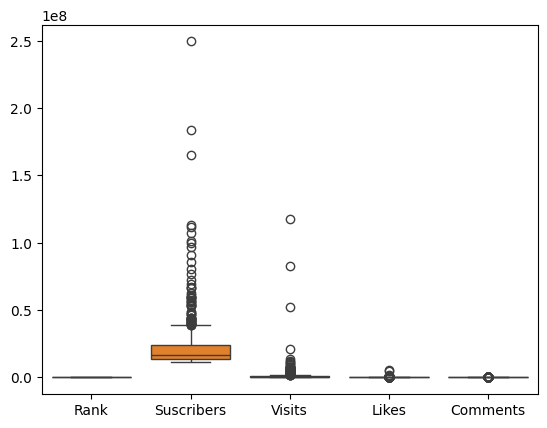

In [7]:
#ploting numric variables using boxplot in order to check if there is outliers associated with any variable.
sns.boxplot(df)

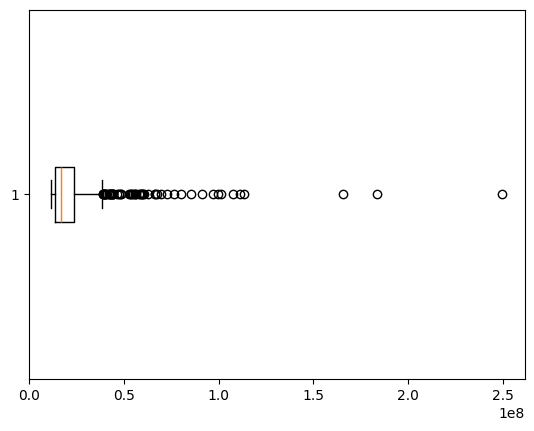

     Rank              Username            Categories  Suscribers  \
78     79           vladvaniki1      Películas, Humor  38700000.0   
80     81           DaddyYankee        Música y baile  38300000.0   
84     85         MariaClaraeJP  Películas, Animación  37700000.0   
86     87           PowerKidstv  Películas, Animación  37400000.0   
89     90         SaregamaMusic             Películas  37000000.0   
..    ...                   ...                   ...         ...   
989   990                   cut                 Humor  11700000.0   
990   991             JoeHattab             Películas  11700000.0   
991   992              BeAmazed             Educación  11700000.0   
997   998  LittleAngelIndonesia        Música y baile  11700000.0   
999  1000         OneindiaHindi   Noticias y Política  11700000.0   

            Country     Visits    Likes  Comments  \
78          Unknown   890600.0   3400.0       0.0   
80         Colombia    82800.0   6500.0     123.0   
84          

<Axes: xlabel='Suscribers'>

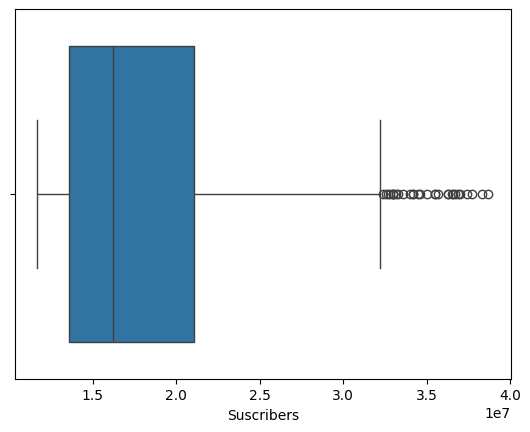

In [8]:
# defining function which will detect outlier for a specific variable
def outliers_detection(df,ft):
    plt.boxplot(df[ft],vert=False)
    plt.show()
outliers_detection(df,'Suscribers')
# function for removing outliers

def outliers_remove(df, val):
    q1 = df[val].quantile(0.25)
    q3 = df[val].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    # Identify outliers using the bounds
    new_df = df.loc[(df[val] > lower_bound) & (df[val] < upper_bound)]
    print(new_df)
    
    # Return indices of outliers
    return new_df
res_df= outliers_remove(df, 'Suscribers')

sns.boxplot(res_df['Suscribers'],orient='h')

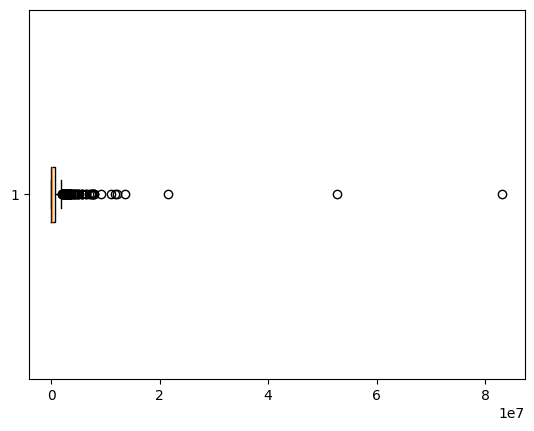

     Rank              Username            Categories  Suscribers  \
78     79           vladvaniki1      Películas, Humor  38700000.0   
80     81           DaddyYankee        Música y baile  38300000.0   
84     85         MariaClaraeJP  Películas, Animación  37700000.0   
86     87           PowerKidstv  Películas, Animación  37400000.0   
89     90         SaregamaMusic             Películas  37000000.0   
..    ...                   ...                   ...         ...   
989   990                   cut                 Humor  11700000.0   
990   991             JoeHattab             Películas  11700000.0   
991   992              BeAmazed             Educación  11700000.0   
997   998  LittleAngelIndonesia        Música y baile  11700000.0   
999  1000         OneindiaHindi   Noticias y Política  11700000.0   

            Country     Visits    Likes  Comments  \
78          Unknown   890600.0   3400.0       0.0   
80         Colombia    82800.0   6500.0     123.0   
84          

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
78,79,vladvaniki1,"Películas, Humor",38700000.0,Unknown,890600.0,3400.0,0.0,http://youtube.com/channel/UCcOMTVILq-yIqtFmOq...
80,81,DaddyYankee,Música y baile,38300000.0,Colombia,82800.0,6500.0,123.0,http://youtube.com/channel/UC9TO_oo4c_LrOiKNaY...
84,85,MariaClaraeJP,"Películas, Animación",37700000.0,Unknown,1700000.0,10800.0,0.0,http://youtube.com/channel/UCKe6w0exI94U-RzqAy...
86,87,PowerKidstv,"Películas, Animación",37400000.0,India,41700.0,0.0,0.0,http://youtube.com/channel/UCj-SWZSE0AmotGSQ3a...
89,90,SaregamaMusic,Películas,37000000.0,India,27300.0,703.0,26.0,http://youtube.com/channel/UC_A7K2dXFsTMAciGmn...
...,...,...,...,...,...,...,...,...,...
989,990,cut,Humor,11700000.0,Estados Unidos,359000.0,8800.0,342.0,http://youtube.com/channel/UCbaGn5VkOVlcRgIWAH...
990,991,JoeHattab,Películas,11700000.0,Somalia,1900000.0,98500.0,2900.0,http://youtube.com/channel/UCe6eisvsctSPvBhmin...
991,992,BeAmazed,Educación,11700000.0,Estados Unidos,477800.0,9900.0,556.0,http://youtube.com/channel/UCkQO3QsgTpNTsOw6uj...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...


In [9]:
# analysis of visits varible
outliers_detection(res_df,'Visits')
outliers_remove(res_df,'Visits')

<Axes: xlabel='Visits'>

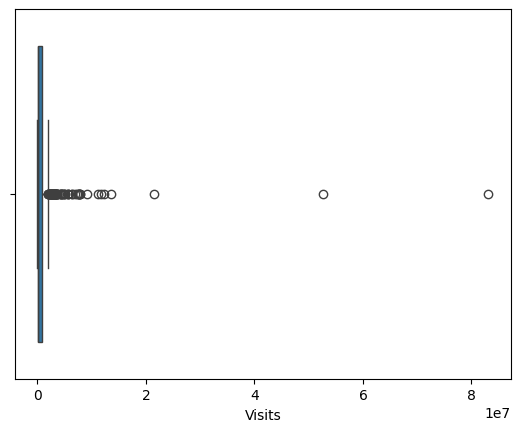

In [10]:
sns.boxplot(res_df['Visits'],orient='h')  # ploting visits variable.

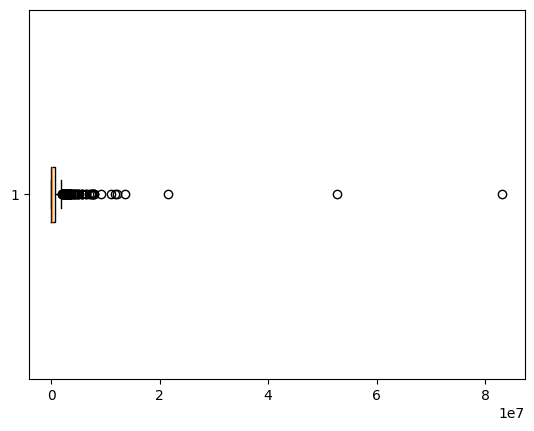

In [11]:
outliers_detection(res_df,'Visits') # calling function.

In [12]:
outliers_remove(df,'Visits')    # calling function for removing outliers.

     Rank              Username            Categories   Suscribers  \
0       1               tseries        Música y baile  249500000.0   
8       9       zeemusiccompany        Música y baile   99700000.0   
9      10                   WWE           Videojuegos   97200000.0   
10     11             BLACKPINK        Música y baile   91300000.0   
12     13               SonySAB  Películas, Animación   85400000.0   
..    ...                   ...                   ...          ...   
989   990                   cut                 Humor   11700000.0   
990   991             JoeHattab             Películas   11700000.0   
991   992              BeAmazed             Educación   11700000.0   
997   998  LittleAngelIndonesia        Música y baile   11700000.0   
999  1000         OneindiaHindi   Noticias y Política   11700000.0   

            Country     Visits     Likes  Comments  \
0             India    86200.0    2700.0      78.0   
8             India    74300.0    2600.0      32.0 

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
8,9,zeemusiccompany,Música y baile,99700000.0,India,74300.0,2600.0,32.0,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...
9,10,WWE,Videojuegos,97200000.0,Estados Unidos,184500.0,6300.0,214.0,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...
10,11,BLACKPINK,Música y baile,91300000.0,Estados Unidos,863200.0,146900.0,3400.0,http://youtube.com/channel/UCOmHUn--16B90oW2L6...
12,13,SonySAB,"Películas, Animación",85400000.0,India,35500.0,615.0,21.0,http://youtube.com/channel/UC6-F5tO8uklgE9Zy8I...
...,...,...,...,...,...,...,...,...,...
989,990,cut,Humor,11700000.0,Estados Unidos,359000.0,8800.0,342.0,http://youtube.com/channel/UCbaGn5VkOVlcRgIWAH...
990,991,JoeHattab,Películas,11700000.0,Somalia,1900000.0,98500.0,2900.0,http://youtube.com/channel/UCe6eisvsctSPvBhmin...
991,992,BeAmazed,Educación,11700000.0,Estados Unidos,477800.0,9900.0,556.0,http://youtube.com/channel/UCkQO3QsgTpNTsOw6uj...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...


<Axes: xlabel='Visits'>

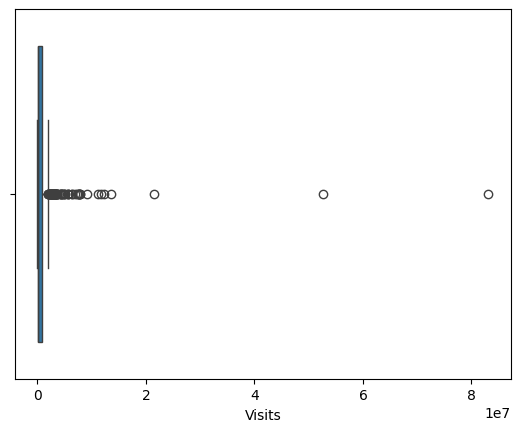

In [13]:
sns.boxplot(res_df['Visits'],orient='h')  # box plot for checking outliers

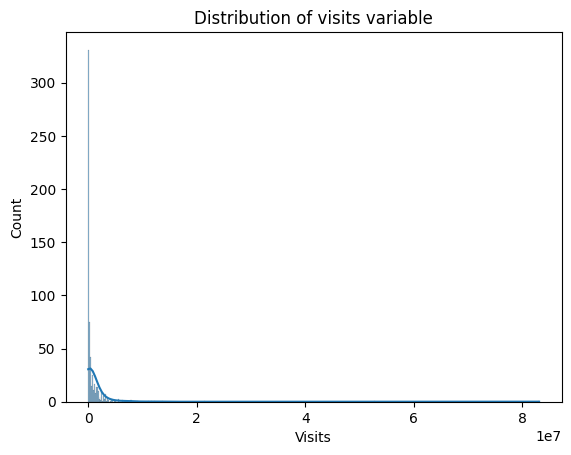

Outliers indices: Index([136, 153, 488, 958], dtype='int64')


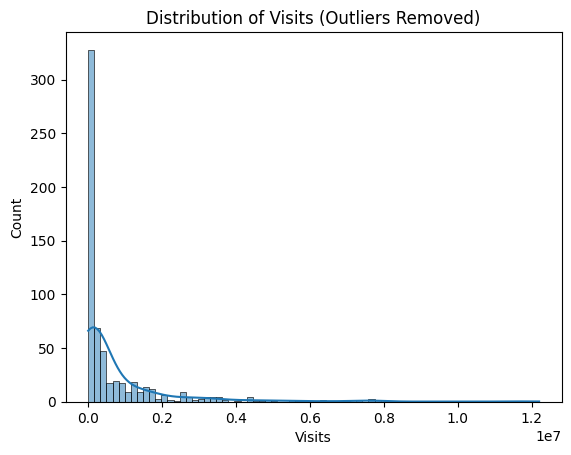

In [14]:
# Visualize the distribution with a histogram
sns.histplot(res_df['Visits'], kde=True)
plt.title('Distribution of visits variable')
plt.xlabel('Visits')
plt.show()

# Calculate mean and standard deviation
mean_visits = res_df['Visits'].mean()
std_visits = res_df['Visits'].std()

# Set a threshold for removing outliers for visits variable.
threshold = mean_visits + 2.9* std_visits
# Identify outliers using the threshold
outliers_indices = res_df[res_df['Visits'] > threshold].index
print("Outliers indices:", outliers_indices)  # Display the identified outliers
# Remove outliers from the DataFrame
df_no_outliers = res_df.drop(outliers_indices)
# Visualize the updated distribution without outliers
sns.histplot(df_no_outliers['Visits'], kde=True)
plt.title('Distribution of Visits (Outliers Removed)')
plt.xlabel('Visits')
plt.show()


<Axes: xlabel='Visits'>

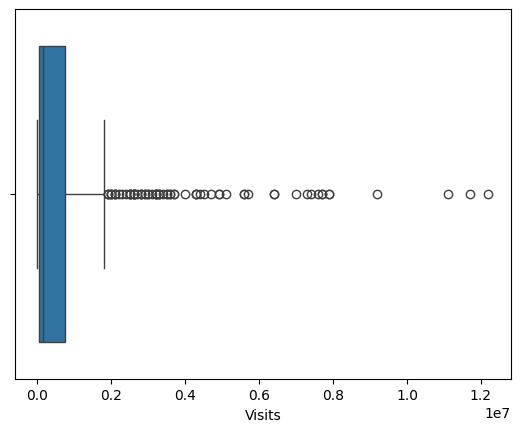

In [15]:
sns.boxplot(df_no_outliers['Visits'],orient='h')  # ploting visits variable using boxplot

In [16]:
df_no_outliers # displaying transformed dataset.

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
78,79,vladvaniki1,"Películas, Humor",38700000.0,Unknown,890600.0,3400.0,0.0,http://youtube.com/channel/UCcOMTVILq-yIqtFmOq...
80,81,DaddyYankee,Música y baile,38300000.0,Colombia,82800.0,6500.0,123.0,http://youtube.com/channel/UC9TO_oo4c_LrOiKNaY...
84,85,MariaClaraeJP,"Películas, Animación",37700000.0,Unknown,1700000.0,10800.0,0.0,http://youtube.com/channel/UCKe6w0exI94U-RzqAy...
86,87,PowerKidstv,"Películas, Animación",37400000.0,India,41700.0,0.0,0.0,http://youtube.com/channel/UCj-SWZSE0AmotGSQ3a...
89,90,SaregamaMusic,Películas,37000000.0,India,27300.0,703.0,26.0,http://youtube.com/channel/UC_A7K2dXFsTMAciGmn...
...,...,...,...,...,...,...,...,...,...
989,990,cut,Humor,11700000.0,Estados Unidos,359000.0,8800.0,342.0,http://youtube.com/channel/UCbaGn5VkOVlcRgIWAH...
990,991,JoeHattab,Películas,11700000.0,Somalia,1900000.0,98500.0,2900.0,http://youtube.com/channel/UCe6eisvsctSPvBhmin...
991,992,BeAmazed,Educación,11700000.0,Estados Unidos,477800.0,9900.0,556.0,http://youtube.com/channel/UCkQO3QsgTpNTsOw6uj...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...


In [17]:
df_no_outliers.info() # checking summary inforamtion about dataset

<class 'pandas.core.frame.DataFrame'>
Index: 630 entries, 78 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        630 non-null    int64  
 1   Username    630 non-null    object 
 2   Categories  630 non-null    object 
 3   Suscribers  630 non-null    float64
 4   Country     630 non-null    object 
 5   Visits      630 non-null    float64
 6   Likes       630 non-null    float64
 7   Comments    630 non-null    float64
 8   Links       630 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 49.2+ KB


<Axes: >

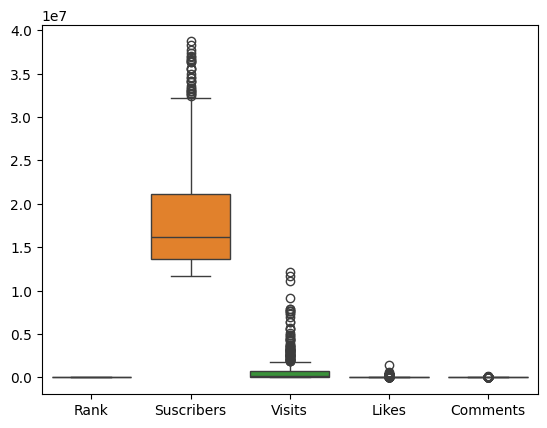

In [18]:
sns.boxplot(df_no_outliers) # ploting numerical variables of dataset using boxplot.

From this figure above, you can see that there is an outlier in our datasets; therefore, a good practice is just 
to remove such outliers from dataset in order to have better analysis.
To remove outliers from datasets, I used interquartile range method and for some variables I 
changed their distribution threshold so that to remain with observations with reasonable values.


#### Trend Analysis

Identifying trends among the top YouTube streamers, including popular content categories, and 
Investigating correlations between subscriber counts and likes or comments.
Insights/ information from data is the most important output that we always want to provide better 
decision for a certain application. Then, using given data, I tried to discover information from dataset 
such as determining top YouTube streamers, including popular content categories, and Investigating 
correlations between subscriber counts and likes or comments.
With python software I got the following insights:
categories are the most popular: I found that musica y baile which is 131.

In [19]:

# Identify the Most Popular Categories
popular_categories = df_no_outliers['Categories'].value_counts().head(5)
print("Most Popular Categories:")
print(popular_categories)

# Correlation Analysis
correlation = df_no_outliers[['Suscribers', 'Likes', 'Comments']].corr()
print("\nCorrelation Matrix:")
print(correlation)


Most Popular Categories:
Categories
Música y baile               131
Películas, Animación          53
Música y baile, Películas     40
Noticias y Política           35
Vlogs diarios                 35
Name: count, dtype: int64

Correlation Matrix:
            Suscribers     Likes  Comments
Suscribers    1.000000  0.072039  0.042726
Likes         0.072039  1.000000  0.435269
Comments      0.042726  0.435269  1.000000


Using correlation matrix as meantioned above; Subscribers and Likes there is no strong correlation as well as correlation 
between subscribers and Likes variable is not strong. Therefore, I conclude that there is week relationship 
between subscribers and Likes variable or subscribers and Likes variable.


#### Audience Study:

Analyzing the distribution of streamers' audiences by country and exploring regional preferences for 
specific content categories.
analyzing the distribution of streamers' audiences by country and exploring regional preferences for 
specific content categories is crucial for making marketing strategies, creating culturally relevant content, 
optimizing content scheduling, facilitating partnerships, and identifying opportunities for market 
expansion. It enables streamers, marketers, and advertisers to effectively engage with their target audience 
and drive success in the competitive landscape of online content creation and streaming.

Figure is described below:


To get distribution of streamers' audiences; I tried to group the data by country and category, and calculate the count of streamers. From I have been able to get country and category with top streamers than others using heatmap matrix. Such country is Estados Unidos and category is musica y baile. 

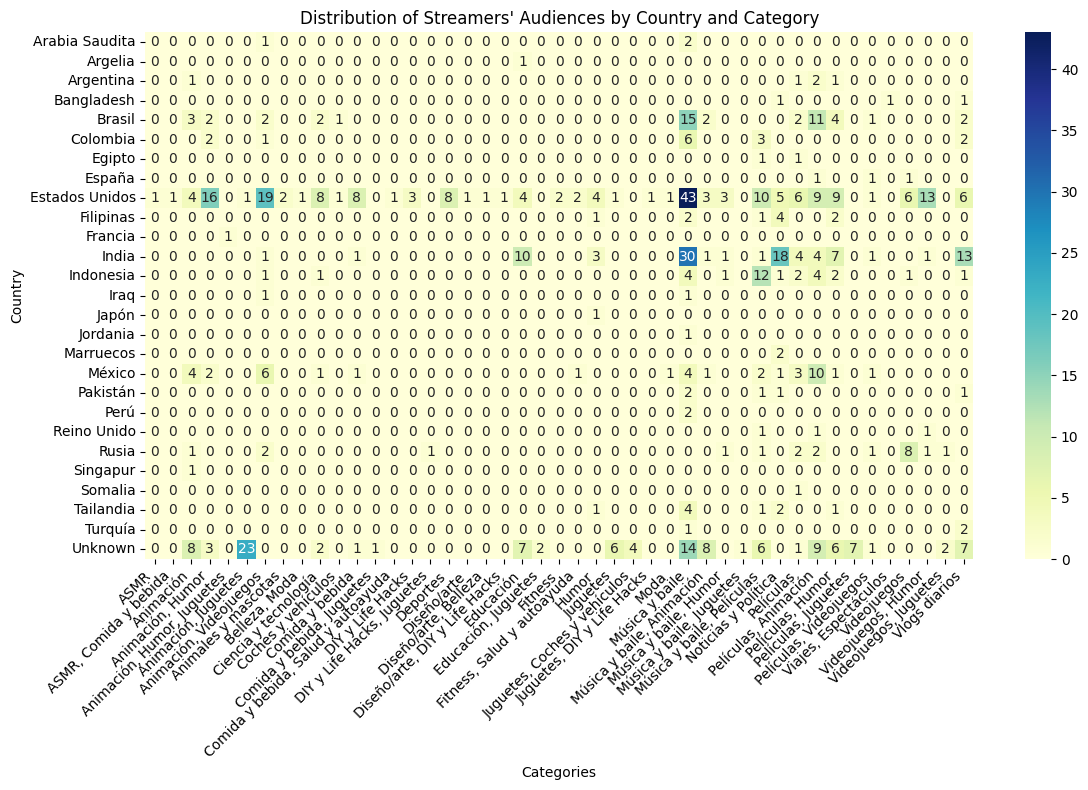

In [20]:
# Grouping the data by country and category, and calculate the count of streamers
audience_distribution = df_no_outliers.groupby(['Country', 'Categories']).size().unstack(fill_value=0)
# Visualize the distribution using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(audience_distribution, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.title('Distribution of Streamers\' Audiences by Country and Category')
plt.xlabel('Categories')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Performance Metrics:

Calculating and visualizing average metrics such as subscribers, visits, likes, and comments and Identifying patterns or anomalies in performance metrics.
calculating and visualizing average metrics and identifying patterns or anomalies in performance metrics are essential for evaluating streamer performance, benchmarking against competitors, detecting trends, optimizing content strategy, and capitalizing on monetization opportunities


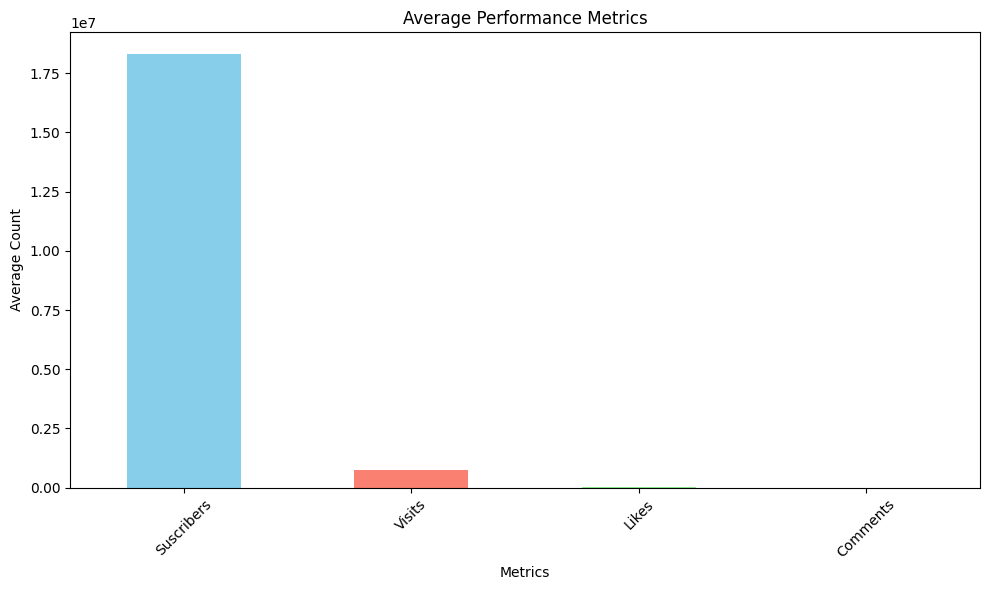

In [21]:

# Calculate the average metrics
average_metrics = df_no_outliers[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()
# Visualize the average metrics
plt.figure(figsize=(10, 6))
average_metrics.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'orange'])
plt.title('Average Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From this graph above, you can see that subscribers variables has high average count; it means that it 
contribute most for streamers to spread the content far. Because, when you subscribe, you always access
new content uploaded. So, subscribers contribute most.

#### Content Categories:

Exploring the distribution of content categories and identifying the most popular ones and Investigating 
performance metrics across different content categories.


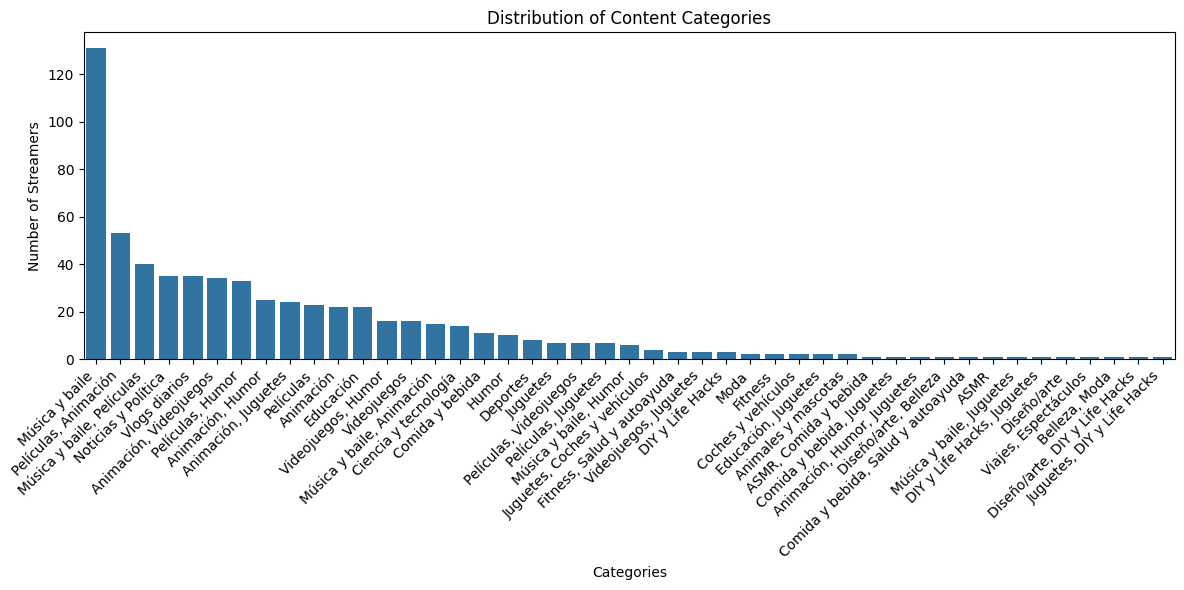

In [34]:
# Calculate the count of streamers in each content category
category_distribution = df_no_outliers['Categories'].value_counts()

# Visualize the distribution of content categories
plt.figure(figsize=(12, 6))
sns.barplot(x=category_distribution.index, y=category_distribution.values)
plt.title('Distribution of Content Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




From the above figure, it is very easy to visualize the most popular categories and their metric 
performance. Therefore, musica y baile is the most popular category among other categories given 
whereby it has 120 number of streamers. This is a good measure because it gives us popular category 
and number of streamers who use it.

#### Brands and Collaborations:

From analysis of data given, I found that subscribers variable plays important roles in YouTube analysis 
dataset; it means that with help of subscribers variable you can be able to detect top stream creators. 
Therefore, content creators with huge number of subscribers have a high chance to be known by many 
people. As result, this will create strong collaboration between content creators and clients (subscribers) 
and this will make the content creator’s brand to be well known. So, subscribers variable is a good metric 
to measure how brand, and collaboration will be for streamers.

#### Benchmarking:

In [22]:

# Calculate average performance metrics
average_metrics = df_no_outliers[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()

# Filter streamers with above-average performance
above_average_streamers = df_no_outliers[
    (df_no_outliers['Suscribers'] > average_metrics['Suscribers']) &
    (df_no_outliers['Visits'] > average_metrics['Visits']) &
    (df_no_outliers['Likes'] > average_metrics['Likes']) &
    (df_no_outliers['Comments'] > average_metrics['Comments'])
]

#  Rank the top-performing content creators
top_performers = above_average_streamers.nlargest(10, ['Suscribers', 'Visits', 'Likes', 'Comments'])

print("Top Performing Content Creators:")
print(top_performers[['Rank', 'Username', 'Suscribers', 'Visits', 'Likes', 'Comments']])


Top Performing Content Creators:
     Rank         Username  Suscribers     Visits     Likes  Comments
96     97   TotalGaming093  36300000.0  1500000.0  129400.0    4900.0
100   101       markiplier  35500000.0  2100000.0  126500.0    3800.0
109   110     SSSniperWolf  34200000.0  1200000.0   34600.0    2100.0
122   123          AboFlah  32700000.0  3300000.0  382000.0   11400.0
131   132     fedevigevani  32000000.0  7700000.0  412200.0   17000.0
132   133            dream  31900000.0  3300000.0  309200.0   19000.0
145   146    jacksepticeye  30400000.0  1600000.0   83400.0    2300.0
171   172  SandeepSeminars  28000000.0  1200000.0   58500.0    4000.0
177   178           DanTDM  27800000.0  3500000.0  285000.0   52500.0
179   180      brentrivera  27600000.0  6400000.0  154100.0    5000.0


Here, I tried to visualize top 10 content creators and I found that TotalGaming093 is first one. 

#### Content Recommendations:

Proposing a system for enhancing content recommendations based on streamers' categories and performance metrics.
By conducting this analysis, we aim to provide valuable insights that can inform strategic decision-making for marketers, advertisers, and content creators in the dynamic landscape of YouTube content creation and streaming. Therefore, obtained observations/ results; you can be able to make strong decisions and take strategies that would help streamers to gain insights useful insights from data.
